## Logistic Regression with ROC curve and ROC AUC score

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

when we were doing prediction was 1 or 0 for binary classification
threshold value for logistic regression is 0.5
> 0.5 = 1, < 0.5 = 0

for different problems and domain expert may tell us the threshold value for different domain
how should we come to conclusion for specific threshold

In [3]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [6]:
## split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

create a dummy model that will always give probability for any data as 0

In [7]:
# created a dummy model with default 0 as output
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [8]:
## lets create basic logistic model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
## prediction based on probability
model_prob = model.predict_proba(X_test)

In [18]:
model_prob

array([[8.17237415e-02, 9.18276259e-01],
       [1.13344259e-01, 8.86655741e-01],
       [9.76832552e-01, 2.31674481e-02],
       [1.81093915e-02, 9.81890609e-01],
       [4.54686794e-02, 9.54531321e-01],
       [2.03249282e-01, 7.96750718e-01],
       [9.93162656e-01, 6.83734407e-03],
       [9.45976087e-01, 5.40239126e-02],
       [8.69028777e-03, 9.91309712e-01],
       [5.91398651e-01, 4.08601349e-01],
       [9.85074068e-01, 1.49259319e-02],
       [8.29281652e-02, 9.17071835e-01],
       [1.37466495e-01, 8.62533505e-01],
       [5.20697767e-03, 9.94793022e-01],
       [9.60063575e-01, 3.99364247e-02],
       [9.50688533e-01, 4.93114672e-02],
       [2.10393564e-02, 9.78960644e-01],
       [8.30240259e-01, 1.69759741e-01],
       [9.62818718e-01, 3.71812822e-02],
       [3.21780632e-02, 9.67821937e-01],
       [9.96085581e-01, 3.91441895e-03],
       [1.14045645e-01, 8.85954355e-01],
       [1.80352806e-01, 8.19647194e-01],
       [4.30414556e-01, 5.69585444e-01],
       [4.115915

In [19]:
## lets focus on positive outcome
model_prob = model_prob[:,1] # all rows second column

In [20]:
## lets calculate the scores

dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


<h2>What does ROC AUC curve give us?</h2>

<h3>False Positive Rate (FPR)</h3>
<p>
    \( FPR = \frac{FP}{FP + TN} \)
</p>

<h3>True Positive Rate (TPR)</h3>
<p>
    \( TPR = \frac{TP}{TP + FN} \)
</p>

<p>
    If we plot <strong>TPR</strong> on the y-axis and <strong>FPR</strong> on the x-axis, we get the <strong>ROC curve</strong>.
</p>

<!-- Include MathJax for proper rendering -->
<script type="text/javascript" async
  src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
</script>


In [27]:
## Calculate ROC Curves

dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

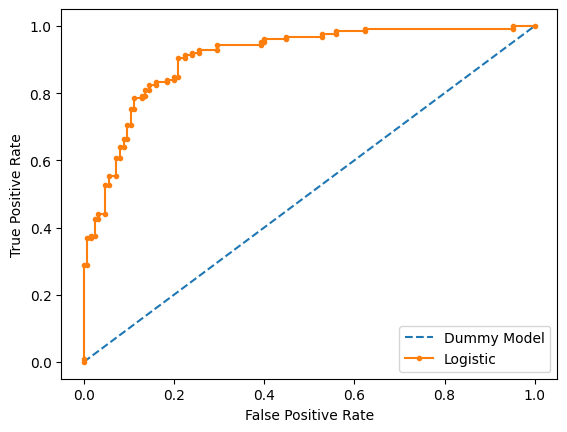

In [44]:
## plot the curve for the model

plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')

#axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#show legend
plt.legend()

#show the plot
plt.show()

### ROC Curve and Threshold Values  

- Based on the threshold values, the **ROC curve** will be testing our model and drawing the curve.  
- Whatever points we have in the above graph are based on some threshold value.  
- Based on the threshold value, we calculate **False Positive Rate (FPR)** and **True Positive Rate (TPR)**, and that is plotted in the above graph.  
- Based on threshold values, we will compute **TPR** and **FPR** and keep on plotting.  
- Wherever there is **high TPR and low FPR**, that threshold will be selected.  


C:\Users\gurunaml\AppData\Local\Temp\ipykernel_3236\2320727396.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


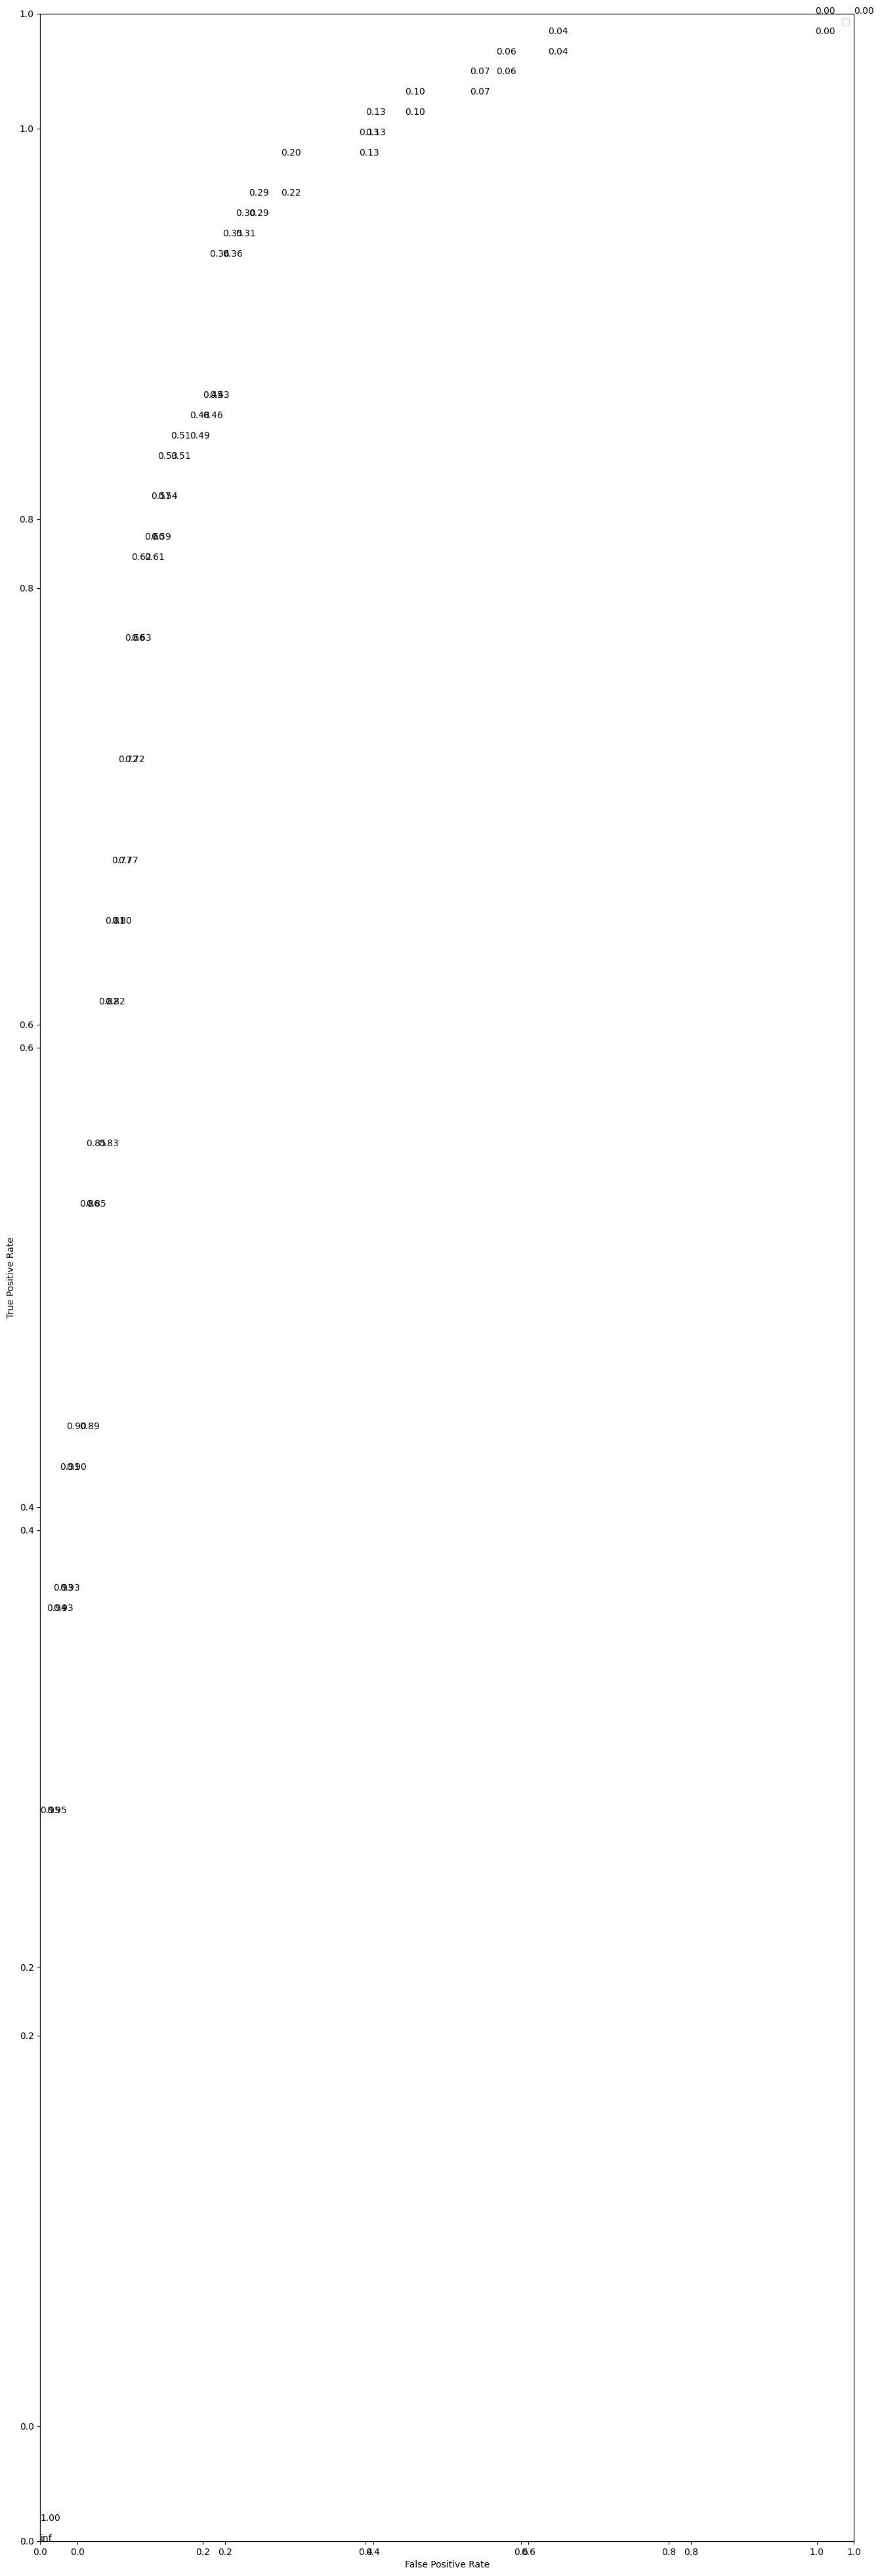

In [42]:
# plot the roc curve for the model

fig = plt.figure(figsize=(16,50))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(1,1,1)

for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{xyz[2]:.2f}', xy=(xyz[0], xyz[1])) # first threshold, then rounding it to 2, then xy is model_fpr and tpr

#axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

plt.legend()
plt.show()

now how should we select threshold

decision making skill with domain expert